In [ ]:
"""
Grupo 23 - TP1 - Algebra Lineal Computacional - 2025

Integrantes:
Sofía Gerpe Lizárraga 411/23
Agustin Russo 39/23
Juan Pablo Anachure 99/16
"""

import numpy as np
import time
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

from template_funciones_2 import *#calcula_L, calcula_lambda, calcula_R, calcula_Q, metpot1, metpot2, metpotI,  metpotI2, laplaciano_iterativo, calcula_2E, deflaciona
from template_funciones import *#calcular_inversa, calculaLU
%load_ext autoreload
%autoreload 2

A = np.array([
   [0, 1, 1, 1, 0, 0, 0, 0],
   [1, 0, 1, 1, 0, 0, 0, 0],
   [1, 1, 0, 1, 0, 1, 0, 0],
   [1, 1, 1, 0, 1, 0, 0, 0],
   [0, 0, 0, 1, 0, 1, 1, 1],
   [0, 0, 1, 0, 1, 0, 1, 1],
   [0, 0, 0, 0, 1, 1, 0, 1],
   [0, 0, 0, 0, 1, 1, 1, 0]
])

In [2]:
L = calcula_L(A)

Para encontrar $\Lambda$ tenemos que encontrar el vector $s^{\Lambda}$ optimo que la minimice. Eso equivale a hallar el autovector asociado al segundo autovalor mas pequeño en modulo de $L$ 

In [3]:
mu = 10e-5
v1, l1, _ = metpotI2(L, mu)
print(f"\nAutovector = \n{v1}\n\nAsociado a λ_1 = {l1}")

LAMBDA = calcula_lambda(L, v1)
print(f"\nEl corte minimo para A es {LAMBDA}")


Autovector = 
[ 0.4253254   0.4253254   0.26286556  0.26286556 -0.26286556 -0.26286556
 -0.4253254  -0.4253254 ]

Asociado a λ_1 = 0.7639320225003927

El corte minimo para A es 2.0


In [4]:
# ver que el auto valor mas chico es 0 y esta asociodo al autvector de 1s
M = L + mu * np.eye(A.shape[0])
print(np.linalg.eigvals(M))
v1, l1, _ = metpotI(L, mu)
print(np.allclose(0,l1 - 1/mu))

v1, l1


[5.23616798e+00 4.00010000e+00 1.00000000e-04 7.64032023e-01
 6.00010000e+00 4.00010000e+00 4.00010000e+00 4.00010000e+00]
True


(array([-0.35355339, -0.35355339, -0.35355339, -0.35355339, -0.35355339,
        -0.35355339, -0.35355339, -0.35355339]),
 np.float64(10000.00000000275))

### Corte minimo

Para hallar el corte minimo podemos hacer recursion sobre la red separandola en $k$ iteraciones. Obteniendo asi $2^{k}$ comunidades.

In [15]:
k = 2
print(laplaciano_iterativo(A, k))

[[5], [4, 6, 7], [0, 1, 3], [2]]


### Modularidad 

Otra forma de hallar comunidades tiene que ver con la **modularidad**. Donde el objetivo esta en maximizar $Q$. Para eso necesitamos el autovector con autovalor de mayor modulo de la matriz $R = A - P$. $R$ es simetrica. La modularidad puede calcularse entonces como $Q = \frac{1}{4E} s^{t}Rs$ con $2E = \sum_{i}^{n} \sum_{j}^{n} A_{ij}$

In [6]:
#Calculamos R
R = calcula_R(A)

print(f"Vemos que R es simetrica, R = R^t: \n{R == R.T}")
#Calculamos su autovector con autovalor de mayor modulo con el metodo de la potencia
v1, l1, _ = metpot1(R)

print(f"\nAutovector: {v1}\nAsociado a λ_1 = {l1}")

Q = calcula_Q(R, v1)

E2 = calcula_2E(A)

# Hace falta dividir por 1/4E ???
Q = Q * 1/(2*E2)
print(f"\nLa modularidad de la red es {Q}")


Vemos que R es simetrica, R = R^t: 
[[ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]]

Autovector: [-0.38475433 -0.38475433 -0.31929819 -0.31933818  0.31933818  0.31929819
  0.38475433  0.38475433]
Asociado a λ_1 = 2.981281138887047

La modularidad de la red es 0.4209183673469387


Podemos aplicar iterativamente sobre los nuevos grupos obtenidos cuando aplicamos la modularidad. El caso en donde el algoritmo para es cuando dividir un grupo no aumenta la modularidad total


In [7]:
print(modularidad_iterativo(A))

[[0, 1, 2, 3], [4, 5, 6, 7]]


Aqui podemos ver como con el metodo de la potencia los componentes del vector aproximado en $\R^{3}$ converge al autovector asociado al autovalor de mayor modulo. 

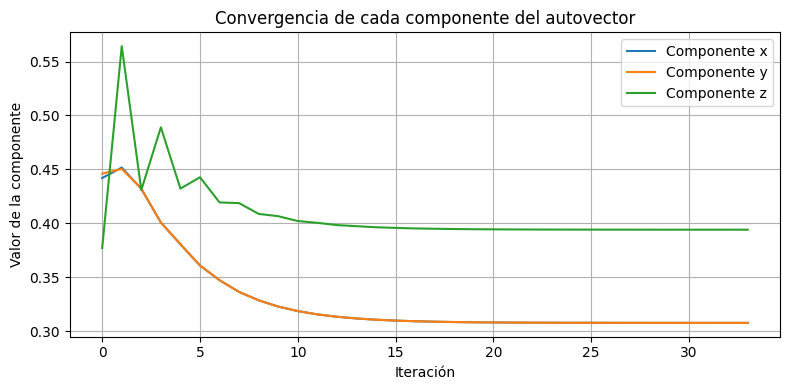

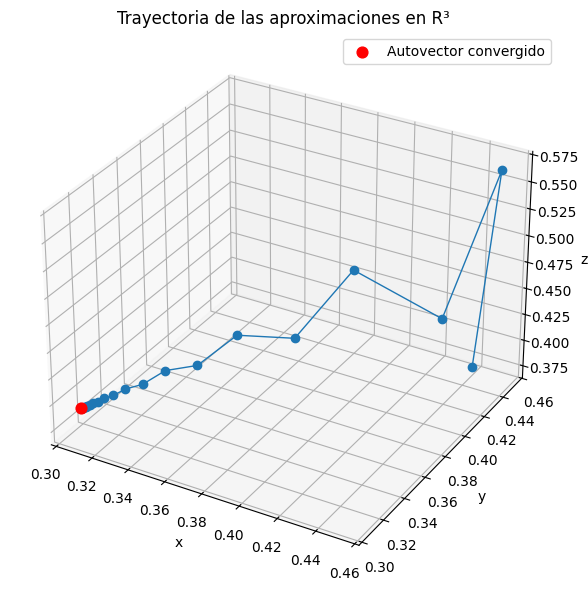

In [8]:
def metpot(A,v,k):
    for i in range(k):
        Av = A @ v
        v = Av / np.linalg.norm(Av, 2)
    return v

# A = np.array([[0.9, 0.075, 0.025], [0.15, 0.8, 0.05], [0.25, 0.25, 0.5]])
# v = np.array([1,0.5,-0.75])


avec, aval, _ = metpot1(A, 1e-10, plot=True)


### 1 - Autovectores y autovalores de $L$ y $R$

a) Muestre que el vector unos es autovector de las matrices $R$ y $L$. ¿Que autovalor tiene? ¿Y que agrupacion de la red representa?

Prueba para $L$

Para que el vector unos sea autovector de L, tiene que cumplir:

$$L \cdot \boldsymbol{1} = \lambda \cdot \boldsymbol{1}$$

Como $L = K - A$,

$$(K-A)\cdot \boldsymbol{1} = \lambda \cdot \boldsymbol{1}$$

$$K\cdot \boldsymbol{1} - A \cdot \boldsymbol{1} = \lambda \cdot \boldsymbol{1}$$


La matriz $K$ es una matriz diagonal donde los elementos de la diagonal son de la forma $\sum_{i=1}^{n} A_{ji}$ con $1 \leq j \leq n$. Como el resto de los elementos $K$ son 0, al multiplicarla con el vector de unos el resultado será un vector donde cada componente $v_j$ es igual a $\sum_{i=1}^{n} A_{ji}$. 

Por otro lado, multiplicar $A$ por el vector unos resultará en un vector donde cada componente $v_j$ es igual a $\sum_{i=1}^{n} A_{ji} . 1 = \sum_{i=1}^{n} A_{ji}$

Entonces,

$$ \begin{pmatrix} \sum_{i=1}^{n} A_{1i} \\\vdots \\\sum_{i=1}^{n} A_{ni} \end{pmatrix} - \begin{pmatrix} \sum_{i=1}^{n} A_{1i} \\\vdots \\\sum_{i=1}^{n} A_{ni} \end{pmatrix} = \lambda \cdot \boldsymbol{1}$$

$$ \boldsymbol{0} = \lambda \cdot \boldsymbol{1}$$

La igualdad sólo es verdadera cuando $\lambda = 0$

Luego, el vector unos es autovector de L asociado al autovalor $\lambda = 0$ 

Prueba para $R$

Para que el vector unos sea autovector de L, tiene que cumplir:

$$R \cdot \boldsymbol{1} = \lambda \cdot \boldsymbol{1}$$

Cómo $R = A - P$

$$(A-P)\cdot \boldsymbol{1} = \lambda \cdot \boldsymbol{1}$$

$$A\cdot \boldsymbol{1} - P \cdot \boldsymbol{1} = \lambda \cdot \boldsymbol{1}$$


Multiplicar $A$ por el vector unos resultará en un vector donde cada componente $v_j$ es igual a $\sum_{i=1}^{n} A_{ji} = K_{ii} = k_i$.

Entonces, sabiendo que los elementos de $P$ tienen la forma $P_{ij}= \frac{k_ik_j}{2E}$:

$$ \begin{pmatrix} k_1 \\\vdots \\ k_n \end{pmatrix} - \begin{pmatrix} \sum_{j=1}^{n} \frac{k_1k_j}{2E} \\\vdots \\ \sum_{j=1}^{n} \frac{k_nk_j}{2E} \end{pmatrix} = \lambda \cdot \boldsymbol{1}$$

$$ \begin{pmatrix} k_1 \\\vdots \\ k_n \end{pmatrix} - \begin{pmatrix} \frac {k_1}{2E}\sum_{j=1}^{n} k_j \\\vdots \\ \frac {k_n}{2E}\sum_{j=1}^{n} k_j \end{pmatrix} = \lambda \cdot \boldsymbol{1}$$

$$ \begin{pmatrix} k_1 \\\vdots \\ k_n \end{pmatrix} - \begin{pmatrix} \frac {k_1}{2E}\sum_{j=1}^{n} \sum_{i=1}^{n} A_{ji} \\\vdots \\ \frac {k_n}{2E}\sum_{j=1}^{n} \sum_{i=1}^{n} A_{ji} \end{pmatrix} = \lambda \cdot \boldsymbol{1}$$

$$ \begin{pmatrix} k_1 \\\vdots \\ k_n \end{pmatrix} - \begin{pmatrix} \frac {k_1}{2E}.2E \\\vdots \\ \frac {k_n}{2E}.2E \end{pmatrix} = \lambda \cdot \boldsymbol{1}$$

$$ \begin{pmatrix} k_1 \\\vdots \\ k_n \end{pmatrix} - \begin{pmatrix}k_1 \\\vdots \\ k_n\end{pmatrix} = \lambda \cdot \boldsymbol{1}$$

$$ \boldsymbol{0} = \lambda \cdot \boldsymbol{1}$$

La igualdad sólo es verdadera cuando $\lambda = 0$

Luego, el vector unos es autovector de R asociado al autovalor $\lambda = 0$

Dado como es el algoritmo el autovector de 1 al tomarle el signo siempre nos determina que hay 1 solo grupo posible, la comunidad total de los museos.  

b) Muestren que si $L$ ($R$) tienen dos autovectores $\boldsymbol{v_1}$ y $\boldsymbol{v_2}$ asociados a autovalores $\lambda_1 \neq \lambda_2$, entonces $\boldsymbol{v_1^t}\boldsymbol{v_2} = 0$.

Primero, probaremos que $\boldsymbol{v_1^t} M \boldsymbol{v_2} = \boldsymbol{v_2^t} M \boldsymbol{v_1}$, si $M$ es simétrica ($M \in \mathbb{R}^{n \times n}, \quad v_1, v_2 \in \mathbb{R}^n$).

Como $\boldsymbol{v_1^t} M \boldsymbol{v_2}$ es un número real (producto interno), se cumple que es igual a su traspuesta.

Por lo tanto, 
$$\boldsymbol{v_1^t} M \boldsymbol{v_2}=(\boldsymbol{v_1^t} M \boldsymbol{v_2})^t = (M\boldsymbol{v_2})^t(\boldsymbol{v_1^t})^t = \boldsymbol{v_2}^t M^t \boldsymbol{v_1}$$

Como $M = M^t$ (M es simétrica),

$$=\boldsymbol{v_2}^t M \boldsymbol{v_1}$$

Luego, la propiedad se cumple.

Ahora, para probar la propiedad de la consigna mostraremos que si una matriz M simétrica tiene dos autovectores $\boldsymbol{v_1}$ y $\boldsymbol{v_2}$ asociados a autovalores $\lambda_1 \neq \lambda_2$, entonces $\boldsymbol{v_1^t}\boldsymbol{v_2} = 0$.

Como $\boldsymbol{v_1}$ y $\boldsymbol{v_2}$ son autovectores de M asociados a $\lambda_1$ y $\lambda_2$, respectivamente, se cumple que:

$ M\boldsymbol{v_1} = \lambda_1\boldsymbol{v_1}$ y
$M\boldsymbol{v_2} = \lambda_2\boldsymbol{v_2}$

Por lo que probramos anteriormente,sabemos que:

$$\boldsymbol{v_1^t} M \boldsymbol{v_2} = \boldsymbol{v_2^t} M \boldsymbol{v_1}$$

Reemplazamos según las dos ecuaciones anteriores

$$\boldsymbol{v_1^t} \lambda_2\boldsymbol{v_2} = \boldsymbol{v_2^t} \lambda_1\boldsymbol{v_1}$$
$$\lambda_2\boldsymbol{v_1^t}\boldsymbol{v_2} = \lambda_1 \boldsymbol{v_2^t}\boldsymbol{v_1}$$
$$\lambda_2\boldsymbol{v_1^t}\boldsymbol{v_2} - \lambda_1 \boldsymbol{v_2^t}\boldsymbol{v_1} = 0$$
$$\lambda_2\boldsymbol{v_1^t}\boldsymbol{v_2} - \lambda_1 \boldsymbol{v_1^t}\boldsymbol{v_2} = 0$$
$$(\lambda_2- \lambda_1 )\boldsymbol{v_1^t}\boldsymbol{v_2} = 0$$

Como $\lambda_1 \neq \lambda_2$, $(\lambda_2 - \lambda_1)$ nunca será 0. La igualdad sólo será verdadera cuando $\boldsymbol{v_2^t}\boldsymbol{v_1} = 0$.

Luego la propiedad se cumplir para un M simétrico cualquiera.

Finalmente, como $L$ y $R$ son matrices simétricas, cumplen con la propiedad.

c) Muestren que si $\boldsymbol{v}$ es un autovector de autovalor $\lambda \neq 0$ de $R$ o $L$, entonces $\sum_{i}\boldsymbol{v_i} = 0$.

Por el punto $a)$, sabemos que el vector unos es un autovector tanto de $L$ como de $R$ asociado al autovalor $\lambda_1 = 0$. Además, por la consigna, suponemos que $\boldsymbol{v}$ es un autovector de $R$ o $L$ de autovalor $\lambda_2 \neq 0$ (llamamos $\lambda_2$ a $\lambda$).

Como son dos autovectores asociados a autovalores distintos de $R$ o $L$, por lo mostrado en el punto $b)$ se cumple que $\boldsymbol{v_1^t}\boldsymbol{v_2} = 0$, con $v_1 = \boldsymbol{v}$ y $v_2 = \boldsymbol{1}$.

Entonces,

$$  \boldsymbol{v} \cdot \begin{pmatrix} 1 \\\vdots \\ 1 \end{pmatrix} = 0 $$

$$ \sum_{i} \boldsymbol{v_i . 1} = 0 $$

$$ \sum_{i} \boldsymbol{v_i} = 0 $$

Luego, la propiedad vale tanto para $L$ como para $R$.

### 2 - Extensiones metodo de la potencia

##### Shifting de autovalores con la red A 

a) $ M \in R^{nxn} $ diagonalizable con autovalores $\lambda{_1}  \ge \lambda{_2} \ge .. \ge \lambda{_n} $  y $\lambda{_i}$ asociado al autovector $v_{i}$

Entonces:

$$(M + \mu I) v{_i} = M v{_i}+ \mu I v{_i} = \lambda{_i} v{_i} + \mu v{_i} = (\lambda{_i} +\mu ) v{_i}$$

Como se puede ver:

$$ \gamma_{i} = (\lambda{_i} +\mu ) \text{ es autovalor de M +} \mu I$$

Ahora veamos que la Matriz $(M + \mu I)$ es no singular:

Como $M$ es diagonalizable entonces necesariamente se escribe 
$$M = CDC^{-1} \text{con } d_{ii} = \lambda_{i}$$

Tambien 

$$\mu I = \mu CC^{-1} =  C\mu C^{-1} $$

Juntando todo: 

$$M + \mu I = CDC^{-1} + C\mu C^{-1} = C(D+ I \mu )C^{-1} $$ 

Entonces para que esto sea inversible cada $\lambda{i} + \mu $ tiene que ser $\neq$ 0 porque sino no seria diagonalizable $M$. 

In [10]:
# Ejemplo de uso del metodo de la potencia para calcular el autovector y autovalor de una matriz A
avec_A, aval_A,_ = metpot1(A)

print(f"Autovector de A:\n{avec_A}\nautovalor asociado: {aval_A}")
mu = 3
M = A + mu*np.eye(A.shape[0])

avec_M, aval_M, _ = metpot1(M) 
print(f"Autovector de A:\n{avec_M}\nautovalor asociado: {aval_M}")

print("aval_A + mu == aval_M: ",np.allclose(aval_A + mu, aval_M))

# Como A tiene 0 en su diagonal diremos que M = A + 0I para confirmar que M no es inversible

calcular_inversa(*calculaLU(A))

Autovector de A:
[0.30777308 0.30777308 0.394155   0.39415501 0.39405042 0.39405042
 0.30763912 0.30763912]
autovalor asociado: 3.5615527839278003
Autovector de A:
[0.30755825 0.30755825 0.39398726 0.39398726 0.39421812 0.39421812
 0.30785392 0.30785392]
autovalor asociado: 6.561552672091558
aval_A + mu == aval_M:  True
La matriz no es inversible


#### Método de la potencia inverso

b) Primero, considerando $\mu > 0$, queremos ver que $L + \mu I$ es inversible.

Como $L$ es simétrica, entonces es diagonalizable. En el punto anterior concluimos que los autovalores de $M + \mu I$ son de la forma $ \lambda_i +\mu$, siendo $M$ una matriz diagonalizable y $\lambda_i$ autovalores de $M$. 

Por lo tanto, los autovalores de $L +\mu I$ son $\lambda_i +\mu$ con autovector asociado $\boldsymbol{v_i}$. Además, concluímos que si $\lambda_i +\mu \neq 0$, $M +\mu I$ es inversible.

Como $L$ es semidefinida positiva, todos sus autovalores son mayores o iguales a 0. Entonces, al hacer $\lambda_i +\mu$, como el autovalor de $L$ más chico posible es 0, sabemos que el autovalor más chico de $L +\mu I$ será $\mu$. Como $\mu > 0$, todos los autovalores de $L +\mu I$ son mayores a 0. Luego, $L +\mu I$ es inversible.

Segundo, queremos mostrar que aplicar el método de la potencia a $(L +\mu I)^{-1}$ converge a su autovector de autovalor más chico. 

Para poder aplicar el método de la potencia, necesitamos que $(L +\mu I)^{-1}$ sea diagonalizable. Como $L +\mu I$ es diagonalizable, su inversa también lo será. Además, los autovalores de $(L +\mu I)^{-1}$ serán $\gamma_i = \frac{1}{\lambda_i + \mu}$ y tendrán como autovectores asociados a $\boldsymbol{v_i}$ (los mismos que $L +\mu I$). Entonces, sabemos que $(L +\mu I)^{-1} \boldsymbol{v_i} = \gamma_i \boldsymbol{v_i}$.


Tomemos la sucesion:

$$ x^{k} =  (L +\mu I)^{-k} x_0 = (\frac{1}{\lambda_1 + \mu})^{k}(\alpha_1 v_1) + (\frac{1}{\lambda_2 + \mu})^{k}(\alpha_2 v_2) + \text{..} + (\frac{1}{\lambda_n + \mu})^{k}(\alpha_n v_n) $$ 

Normalizamos 

$$\frac{(L +\mu I)^{-k} x_0}{||(L +\mu I)^{-k} x_0||} = \frac{(\frac{1}{\lambda_1 + \mu})^{k}(\alpha_1 v_1) + (\frac{1}{\lambda_2 + \mu})^{k}(\alpha_2 v_2) + \text{..} + (\frac{1}{\lambda_n + \mu})^{k}(\alpha_n v_n)}{||(\frac{1}{\lambda_1 + \mu})^{k}(\alpha_1 v_1) + (\frac{1}{\lambda_2 + \mu})^{k}(\alpha_2 v_2) + \text{..} + (\frac{1}{\lambda_n + \mu})^{k}(\alpha_n v_n)||}$$

Tomando factor comun:

$$\frac{(L +\mu I)^{-k} x_0}{||(L +\mu I)^{-k} x_0||} = (\frac{\lambda_1 + \mu}{|\lambda_1 + \mu|})^{k} \frac{(\alpha_1 v_1) + (\frac{\lambda_1 + \mu}{\lambda_2 + \mu})^{k}(\alpha_2 v_2) + \text{..} + (\frac{\lambda_1 + \mu}{\lambda_n + \mu})^{k}(\alpha_n v_n)}{||(\alpha_1 v_1) + (\frac{\lambda_1 + \mu}{\lambda_2 + \mu})^{k}(\alpha_2 v_2) + \text{..} + (\frac{\lambda_1 + \mu}{\lambda_n + \mu})^{k}(\alpha_n v_n)||}$$

$\text{Tomando } \gamma_1 = \lambda_1 + \mu$

$$ \frac{(L +\mu I)^{-k} x_0}{||(L +\mu I)^{-k} x_0||} = signo(\gamma_1)^{k}  \frac{(\alpha_1 v_1) + (\frac{\lambda_1 + \mu}{\lambda_2 + \mu})^{k}(\alpha_2 v_2) + \text{..} + (\frac{\lambda_1 + \mu}{\lambda_n + \mu})^{k}(\alpha_n v_n)}{||(\alpha_1 v_1) + (\frac{\lambda_1 + \mu}{\lambda_2 + \mu})^{k}(\alpha_2 v_2) + \text{..} + (\frac{\lambda_1 + \mu}{\lambda_n + \mu})^{k}(\alpha_n v_n)||}$$

Tomando el limite: 

$$ \lim_{k \rightarrow \infty}{}signo(\gamma_1)^{k}  \frac{(\alpha_1 v_1) + (\frac{\lambda_1 + \mu}{\lambda_2 + \mu})^{k}(\alpha_2 v_2) + \text{..} + (\frac{\lambda_1 + \mu}{\lambda_n + \mu})^{k}(\alpha_n v_n)}{||(\alpha_1 v_1) + (\frac{\lambda_1 + \mu}{\lambda_2 + \mu})^{k}(\alpha_2 v_2) + \text{..} + (\frac{\lambda_1 + \mu}{\lambda_n + \mu})^{k}(\alpha_n v_n)||}$$

Entonces veamos que : 

$$ \lim_{k \rightarrow \infty} (\frac{\lambda_1 + \mu}{\lambda_n + \mu})^{k} = 0 $$

Esto porque $ | \lambda_1 + \mu |< |\lambda_n + \mu |$ dado que $ |\frac{1}{\lambda_1 + \mu}| > |\frac{1}{\lambda_2 + \mu}| \geq \text{..} \geq |\frac{1}{\lambda_n + \mu}|$

Veamos que el limte anterior queda:

$$ \frac{(L +\mu I)^{-k} x_0}{||(L +\mu I)^{-k} x_0||} = \text{signo}( \gamma_1 ) \frac{(\alpha_1 v_1)}{||\alpha_1 v_1||}$$

Que es el autovector dominante de la matriz $(L +\mu I)^{-1}$ que coincide con el autovector mas chico de $L +\mu I$. Por el 1a sabemos que el autovector de $L$ es $\bold{1}$ y su autovalor asociado es $\bold{0}$, tambien por el 2a el autovector $\bold{1}$ es tambien autovector de $L +\mu I$ y de su inversa, y que su autovalor es $\mu, \frac{1}{\mu}$ respectivamente.

Como sabemos que L es semidefinida positiva entonces todos los autovalores son mayores o iguales a 0, pero hay uno, particularmente el mas chico, que es 0 entonces cuando sumamos $\mu$ esto se sigue cumpliendo ya que $\mu > 0$, concluyendo que $\frac{1}{\mu}$ debe ser el autovalor mas grande de $(L + \mu)^{-1}$


In [ ]:
# Ejemplo de uso del metodo de la potencia inversa para calcular el autovector y autovalor de la matriz laplaciana L
L = calcula_L(A)
mu = 1
print(np.diag(L+mu*np.eye(L.shape[0])))

v1, l1, _ = metpotI(L, mu)
print(f"Autovector de autovalor mas chico:\n{v1}\nAutovalor mas chico: {l1}")

#El autovalor es casi 1 ya que le sumamos 1 a los autovalores de L. Si lo restamos obtenemos el autovalor mas chico en modulo de L que es 0.
print(np.allclose(0,l1-mu))

[51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51.
 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51.
 51. 51. 51. 52. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 52. 51. 51.
 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51.
 51. 51. 51. 52. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51.
 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51.
 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51.
 51. 51. 51. 51. 51. 51. 51. 51. 51. 51.]
Autovector de autovalor mas chico:
[-0.08574929 -0.08574929 -0.08574929 -0.08574929 -0.08574929 -0.08574929
 -0.08574929 -0.08574929 -0.08574929 -0.08574929 -0.08574929 -0.08574929
 -0.08574929 -0.08574929 -0.08574929 -0.08574929 -0.08574929 -0.08574929
 -0.08574929 -0.08574929 -0.08574929 -0.08574929 -0.08574929 -0.08574929
 -0.08574929 -0.08574929 -0.08574929 -0.08574929 -0.08574929 -0.08574929
 -0.08574929 -0.08574929 -0.08574929 -0.0857492

##### Deflación de Hotelling

c)
$ M $ simetrica , {$ v_1, v_2,.., v_n$} es una base ortonormal de autovectores.

Como es una base ortonormal, sabemos que $<v_i,v_j >$ vale


$$\begin{cases}
0 & \text{si } i = j \\
\| \mathbf{v_i} \|_2^{2} & \text{caso contrario}
\end{cases}
$$

entonces veamos

$$\tilde{M} v_i= ({M} - \lambda_1 \frac{\mathbf{v}_1 \mathbf{v}_1^t}{\mathbf{v}_1^t \mathbf{v}_1})v_i $$




Si $v_i \neq v_1 $ entonces 

  $$v_1^{t} * v_i = 0 \rightarrow \lambda_1 \frac{\mathbf{v}_1 \mathbf{v}_1^t}{\mathbf{v}_1^t \mathbf{v}_1}v_i = 0$$
  
  finalmente $$\tilde{M}v_i ={M} v_i =  \lambda_{i} v_i $$ 

Entonces para i $\neq 1 $ tiene los mismos autovalores.

Si $v_i = v_1 $ entonces

  $$ v_1^{t} * v_1 = \| \mathbf{v_1} \|_2 ^{2}$$ 
  
se puede ver que  

  $$\tilde{M}v_1 = {M}v_1 - \lambda_1 \frac{\mathbf{v}_1 \mathbf{v}_1^t}{\mathbf{v}_1^t \mathbf{v}_1} v_1 = {M}v_1 - \lambda_1 v_1 = \lambda_1 v_1 - \lambda_1 v_1 = 0 v_1$$

Probando que el autovalor asociado a $v_1$ es 0. 




Por lo mencionado anteriormente si  $\lambda_{i} \neq 0 \forall i \rightarrow L + \mu I$ es inversible. Nos podemos asegurar de que ningun elemento de la diagonal sea igual a 0.  


Usaremos $A$ que sabemos que es simetrica y por lo tanto tiene una base de autovectores ortogonales para mostrar que una vez deflacionada A, $deflaciona(A) = A'$ su autovector $v_{1}$ asociado al autovalor de mayor modulo $\lambda_{1}$ de A, ahora para $A'$ esta asociado al autovalor 0. Para eso vamos a suponer que si $\lambda = 0$ es el autovalor asociado a $v_{1}$ vale que:

$$ A'v_{1} = \lambda v_{1} = 0v_{1} = 0 $$

In [17]:
#Calculamos el autovector y autovalor de mayor modulo para A
v1,l1,_= metpot1(A,1e-17)

#Aplicamos la deflación a A para obtener A'
deflA = deflaciona(A)

#Calculamos A'v_1
print(deflA@v1)
print(np.allclose(0,deflA@v1))

[ 1.36849470e-08  1.36849470e-08  1.06860710e-08  1.06836968e-08
 -1.06836957e-08 -1.06860703e-08 -1.36849464e-08 -1.36849464e-08]
False


## Volviendo a los museos 

In [18]:
# Carga de paquetes necesarios para graficar
import matplotlib.pyplot as plt
import geopandas as gpd # Para hacer cosas geográficas
import networkx as nx # Construcción de la red en NetworkX
from template_funciones import *

%load_ext autoreload
%autoreload 2

# Leemos el archivo, retenemos aquellos museos que están en CABA, y descartamos aquellos que no tienen latitud y longitud
museos = gpd.read_file('https://raw.githubusercontent.com/MuseosAbiertos/Leaflet-museums-OpenStreetMap/refs/heads/principal/data/export.geojson')
barrios = gpd.read_file('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.geojson')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


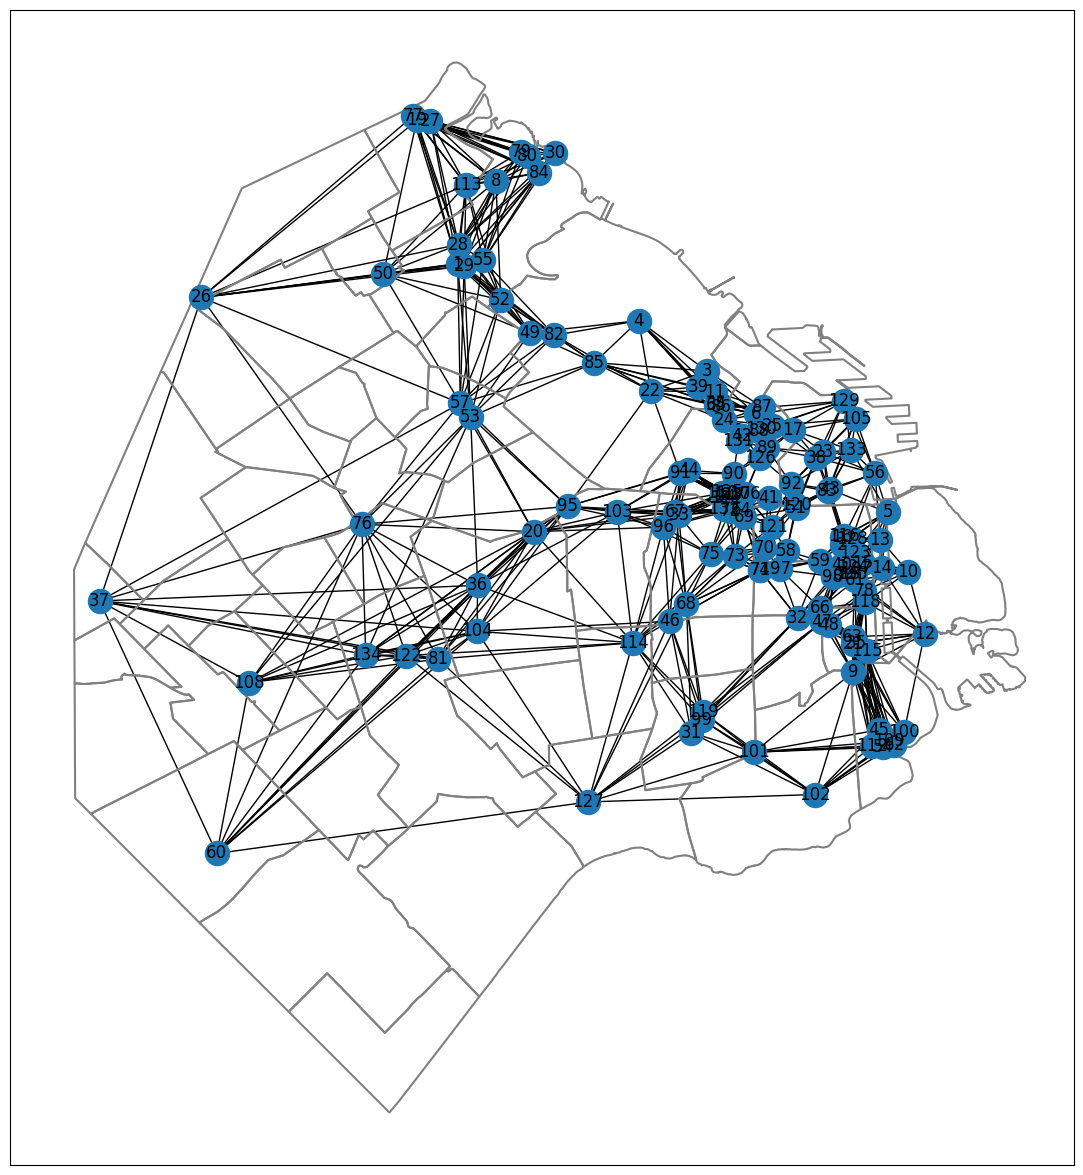

In [19]:
# En esta línea:
# Tomamos museos, lo convertimos al sistema de coordenadas de interés, extraemos su geometría (los puntos del mapa), 
# calculamos sus distancias a los otros puntos de df, redondeamos (obteniendo distancia en metros), y lo convertimos a un array 2D de numpy
D = museos.to_crs("EPSG:22184").geometry.apply(lambda g: museos.to_crs("EPSG:22184").distance(g)).round().to_numpy()
m = 10 # Cantidad de links por nodo
A = construye_adyacencia(D,m)

G = nx.from_numpy_array(A) # Construimos la red a partir de la matriz de adyacencia
# Construimos un layout a partir de las coordenadas geográficas
G_layout = {i:v for i,v in enumerate(zip(museos.to_crs("EPSG:22184").get_coordinates()['x'],museos.to_crs("EPSG:22184").get_coordinates()['y']))}
fig, ax = plt.subplots(figsize=(15, 15)) # Visualización de la red en el mapa
barrios.to_crs("EPSG:22184").boundary.plot(color='gray',ax=ax) # Graficamos Los barrios
nx.draw_networkx(G,G_layout,ax=ax) # Graficamos los museos

Calculando particiones optimas con el metodo del lapaciano para distintas redes

In [20]:
A = construye_adyacencia(D,10)
A_sim = np.ceil(1/2*(A + A.T))
print(A_sim == A_sim.T)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


4 grupos en red con 3 conexiones
Tiempo laplaciano:  0.12018890000763349
Cantidad de grupos: 4
Grupo 0 | Museos: 19 | Color #1f77b4
Grupo 1 | Museos: 21 | Color #ff7f0e
Grupo 2 | Museos: 57 | Color #2ca02c
Grupo 3 | Museos: 39 | Color #d62728
Nodos con color asignado: 136
4 grupos en red con 5 conexiones
Tiempo laplaciano:  0.10392640001373366
Cantidad de grupos: 4
Grupo 0 | Museos: 46 | Color #1f77b4
Grupo 1 | Museos: 24 | Color #ff7f0e
Grupo 2 | Museos: 44 | Color #2ca02c
Grupo 3 | Museos: 22 | Color #d62728
Nodos con color asignado: 136
4 grupos en red con 10 conexiones
Tiempo laplaciano:  0.09843059998820536
Cantidad de grupos: 4
Grupo 0 | Museos: 37 | Color #1f77b4
Grupo 1 | Museos: 21 | Color #ff7f0e
Grupo 2 | Museos: 35 | Color #2ca02c
Grupo 3 | Museos: 43 | Color #d62728
Nodos con color asignado: 136
4 grupos en red con 50 conexiones
Tiempo laplaciano:  0.09788200000184588
Cantidad de grupos: 4
Grupo 0 | Museos: 32 | Color #1f77b4
Grupo 1 | Museos: 38 | Color #ff7f0e
Grupo 2 | 

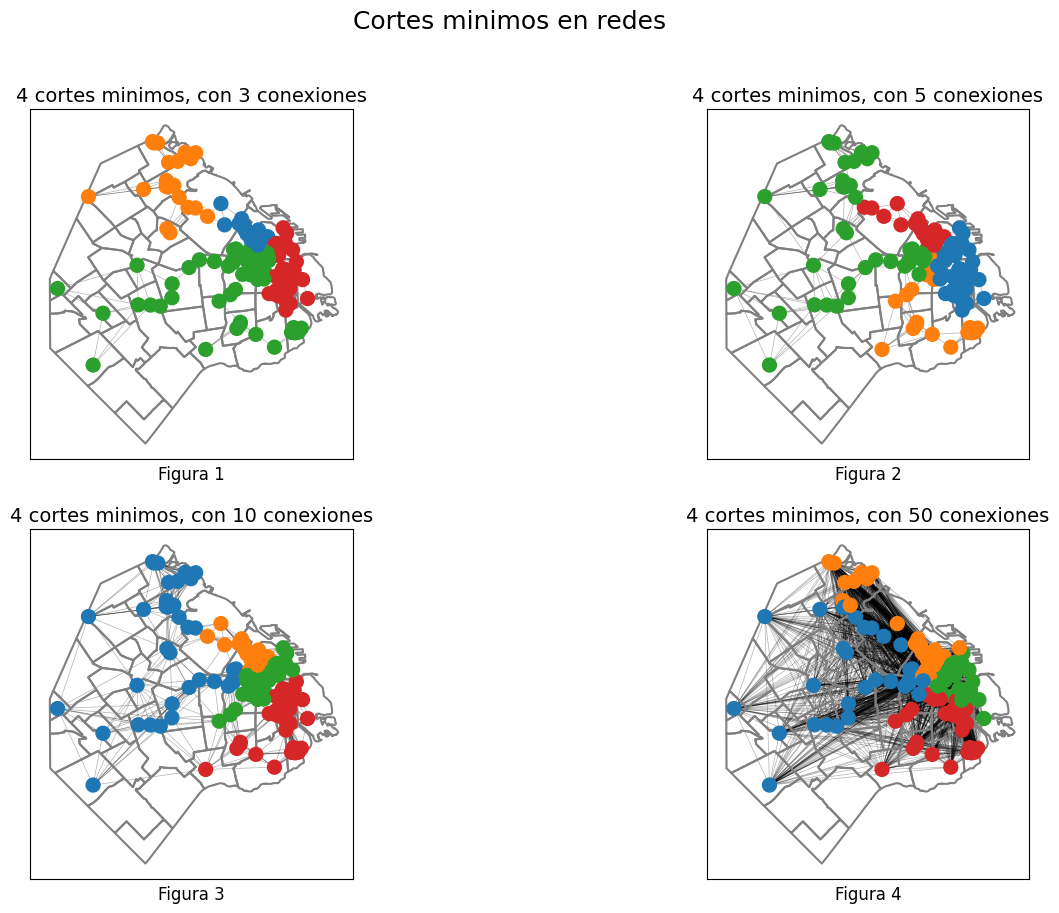

In [ ]:
k = 2
ms = [3,5,10,50]
fig, axs = plt.subplots(2, 2, figsize=(16, 10), squeeze=True)
fig.suptitle("Cortes minimos en redes", fontsize=18)
for idx_num, m in enumerate(ms):
    print(f"{2**k} grupos en red con {m} conexiones")
    start = time.perf_counter()
    
    A = construye_adyacencia(D,m)
    A_sim = np.ceil(1/2*(A + A.T))
    nombres = laplaciano_iterativo(A_sim,k)

    print("Tiempo laplaciano: ", time.perf_counter() - start)
    print(f"Cantidad de grupos: {len(nombres)}")
    

    axs = axs.flatten()
    num_grupos = len(nombres)
    colormap = plt.get_cmap('tab10' if num_grupos <= 10 else 'tab20')  # Elegí un mapa de colores. También podés usar 'hsv', 'Set3', etc.

    # Asignar un color a cada grupo
    # Asignar un color a cada grupo
    grupo_color = {}
    for grupo_id, grupo in enumerate(nombres):
        color = mcolors.to_hex(colormap(grupo_id % colormap.N))
        print(f"Grupo {grupo_id} | Museos: {len(grupo)} | Color {color}")
        for nodo in grupo:
            grupo_color[nodo] = color  # Asegura que la clave sea string

    print("Nodos con color asignado:", len(grupo_color))

    # Crear colores de nodos
    colores_nodos = [grupo_color.get(n, "#000000") for n in G.nodes]

    # Dibujar
    barrios.to_crs("EPSG:22184").boundary.plot(color='gray', ax=axs[idx_num])
    axs[idx_num].set_title(f"{num_grupos} cortes minimos, con {m} conexiones", fontsize=14)

    G = nx.from_numpy_array(A) # Construimos la red a partir de la matriz de adyacencia
    # Construimos un layout a partir de las coordenadas geográficas
    G_layout = {i:v for i,v in enumerate(zip(museos.to_crs("EPSG:22184").get_coordinates()['x'],museos.to_crs("EPSG:22184").get_coordinates()['y']))}
    nx.draw_networkx_nodes(
    G,
    G_layout,
    node_size=100,
    ax=axs[idx_num],
    node_color=colores_nodos
    )
    nx.draw_networkx_edges(
        G,
        G_layout,
        ax=axs[idx_num],
        alpha=0.3,
        width=0.5
    )
    axs[idx_num].set_xlabel(f'Figura {idx_num + 1}', fontsize=12)



Como se puede ver en la figura, los cortes mínimos en la red de museos de CABA son bastante distintos entre sí. A medida que se aumentan las conexiones, los cortes mínimos tienden a ser más grandes y menos específicos, ya que la red se vuelve más densa y los grupos se mezclan más. Por ejemplo: 

* En la figura 1 a comparación con el resto las comunidades se encuentran muy cercanas, ya que al tener pocas conexiones no son capaces de extenderse por el mapa. 
* Cuanto mayor es la cantidad de conexiones como en la figura 3 las comunidades se encuentran muy marcadas y localizadas veamos que la comunidad azul ahora ocupa la gran mayoria de los museos no centricos algo que tambien podemos ver en la comunidad roja de la misma imagen. 
* Finalmente en la figura 4 se puede notar un exceso de conectividad haciendo que se borre la tendencia de como venian separandose las comunidades, ahora vemos una segmentación no tan clara como en las figuras anteriores. 

Modularidad en red de 3 conexiones.
cantidad de comunidades:  16
Tiempo modularidad:  0.10724769998341799
Cantidad de grupos: 16
Grupo 0 | Museos: 5 | Color #1f77b4
Grupo 1 | Museos: 17 | Color #aec7e8
Grupo 2 | Museos: 8 | Color #ff7f0e
Grupo 3 | Museos: 13 | Color #ffbb78
Grupo 4 | Museos: 7 | Color #2ca02c
Grupo 5 | Museos: 5 | Color #98df8a
Grupo 6 | Museos: 9 | Color #d62728
Grupo 7 | Museos: 4 | Color #ff9896
Grupo 8 | Museos: 5 | Color #9467bd
Grupo 9 | Museos: 3 | Color #c5b0d5
Grupo 10 | Museos: 10 | Color #8c564b
Grupo 11 | Museos: 10 | Color #c49c94
Grupo 12 | Museos: 11 | Color #e377c2
Grupo 13 | Museos: 16 | Color #f7b6d2
Grupo 14 | Museos: 9 | Color #7f7f7f
Grupo 15 | Museos: 4 | Color #c7c7c7
Nodos con color asignado: 136
Modularidad en red de 5 conexiones.
cantidad de comunidades:  11
Tiempo modularidad:  0.09236409998266026
Cantidad de grupos: 11
Grupo 0 | Museos: 1 | Color #1f77b4
Grupo 1 | Museos: 11 | Color #aec7e8
Grupo 2 | Museos: 21 | Color #ff7f0e
Grupo 3 | Muse

c:\Users\yo_ju\Desktop\TP2-alc-2025-2C\template_funciones_2.py:86: RuntimeWarning: invalid value encountered in divide
  avec1 = avec1 / np.linalg.norm(avec1, 2)  # normalizamos


Modularidad en red de 10 conexiones.
cantidad de comunidades:  7
Tiempo modularidad:  0.03401629999279976
Cantidad de grupos: 7
Grupo 0 | Museos: 13 | Color #1f77b4
Grupo 1 | Museos: 27 | Color #ff7f0e
Grupo 2 | Museos: 8 | Color #2ca02c
Grupo 3 | Museos: 20 | Color #d62728
Grupo 4 | Museos: 24 | Color #9467bd
Grupo 5 | Museos: 18 | Color #8c564b
Grupo 6 | Museos: 26 | Color #e377c2
Nodos con color asignado: 136
Modularidad en red de 50 conexiones.
cantidad de comunidades:  2
Tiempo modularidad:  0.019709299987880513
Cantidad de grupos: 2
Grupo 0 | Museos: 67 | Color #1f77b4
Grupo 1 | Museos: 69 | Color #ff7f0e
Nodos con color asignado: 136


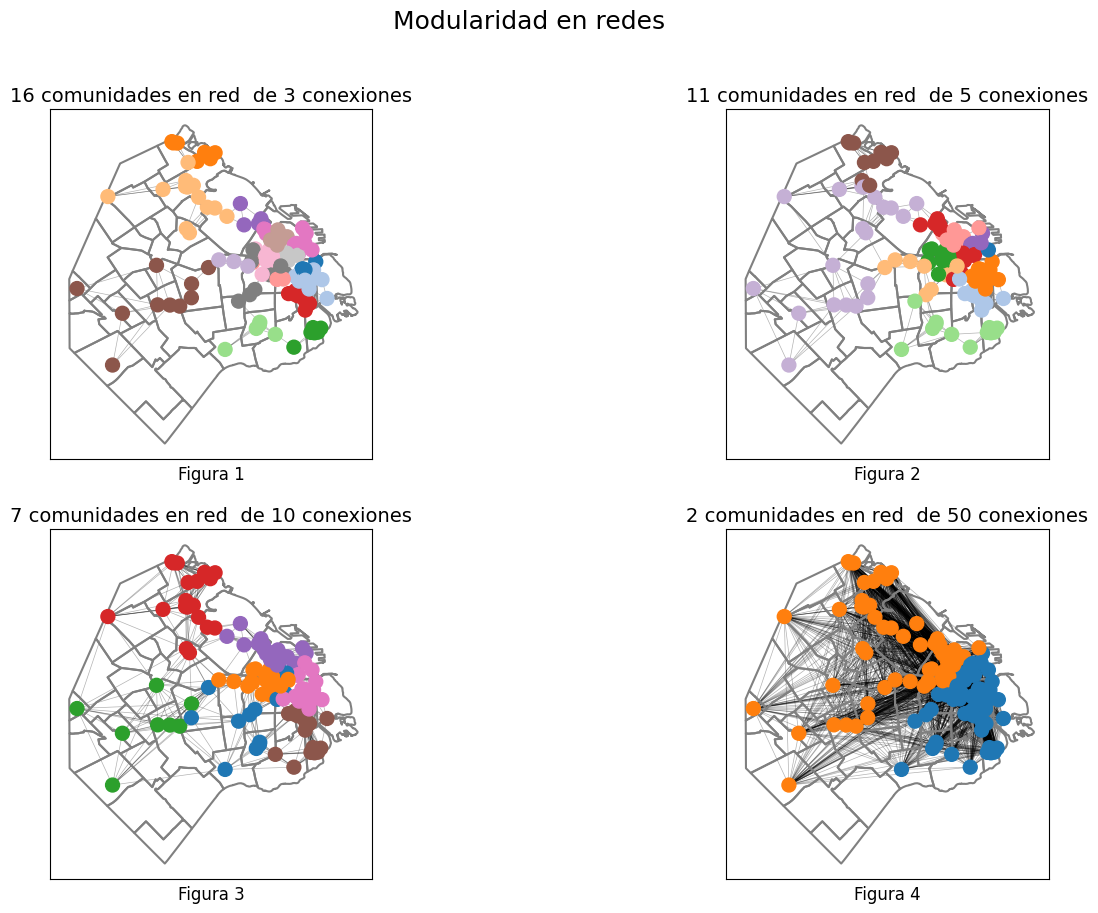

In [24]:
ms = [3,5,10,50]

fig, axs = plt.subplots(2, 2, figsize=(16, 10), squeeze=True)
fig.suptitle("Modularidad en redes", fontsize=18)
for idx_num, m in enumerate(ms):
    print(f"Modularidad en red de {m} conexiones.")
    start = time.perf_counter()
    
    A = construye_adyacencia(D,m)
    A_sim = np.ceil(1/2*(A + A.T))
    nombres = modularidad_iterativo(A_sim)
    print("cantidad de comunidades: ", len(nombres))
    print("Tiempo modularidad: ", time.perf_counter() - start)
    print(f"Cantidad de grupos: {len(nombres)}")
    

    axs = axs.flatten()
    num_grupos = len(nombres)
    colormap = plt.get_cmap('tab10' if num_grupos <= 10 else 'tab20')  # Elegí un mapa de colores. También podés usar 'hsv', 'Set3', etc.

    # Asignar un color a cada grupo
    # Asignar un color a cada grupo
    grupo_color = {}
    for grupo_id, grupo in enumerate(nombres):
        color = mcolors.to_hex(colormap(grupo_id % colormap.N))
        print(f"Grupo {grupo_id} | Museos: {len(grupo)} | Color {color}")
        for nodo in grupo:
            grupo_color[nodo] = color  # Asegura que la clave sea string

    print("Nodos con color asignado:", len(grupo_color))

    # Crear colores de nodos
    colores_nodos = [grupo_color.get(n, "#000000") for n in G.nodes]

    # Dibujar
    barrios.to_crs("EPSG:22184").boundary.plot(color='gray', ax=axs[idx_num])
    axs[idx_num].set_title(f"{num_grupos} comunidades en red  de {m} conexiones", fontsize=14)

    G = nx.from_numpy_array(A) # Construimos la red a partir de la matriz de adyacencia
    # Construimos un layout a partir de las coordenadas geográficas
    G_layout = {i:v for i,v in enumerate(zip(museos.to_crs("EPSG:22184").get_coordinates()['x'],museos.to_crs("EPSG:22184").get_coordinates()['y']))}
    nx.draw_networkx_nodes(
    G,
    G_layout,
    node_size=100,
    ax=axs[idx_num],
    node_color=colores_nodos,
    )
    nx.draw_networkx_edges(
        G,
        G_layout,
        ax=axs[idx_num],
        alpha=0.3,
        width=0.5
    )    
    axs[idx_num].set_xlabel(f'Figura {idx_num + 1}', fontsize=12)


Modularidad en red de 20 conexiones.
cantidad de comunidades:  6
Tiempo modularidad:  0.04252040002029389
Cantidad de grupos: 6
Grupo 0 | Museos: 3 | Color #1f77b4
Grupo 1 | Museos: 44 | Color #ff7f0e
Grupo 2 | Museos: 24 | Color #2ca02c
Grupo 3 | Museos: 30 | Color #d62728
Grupo 4 | Museos: 6 | Color #9467bd
Grupo 5 | Museos: 29 | Color #8c564b
Nodos con color asignado: 136
Modularidad en red de 30 conexiones.
cantidad de comunidades:  4
Tiempo modularidad:  0.030845799978123978
Cantidad de grupos: 4
Grupo 0 | Museos: 5 | Color #1f77b4
Grupo 1 | Museos: 48 | Color #ff7f0e
Grupo 2 | Museos: 38 | Color #2ca02c
Grupo 3 | Museos: 45 | Color #d62728
Nodos con color asignado: 136


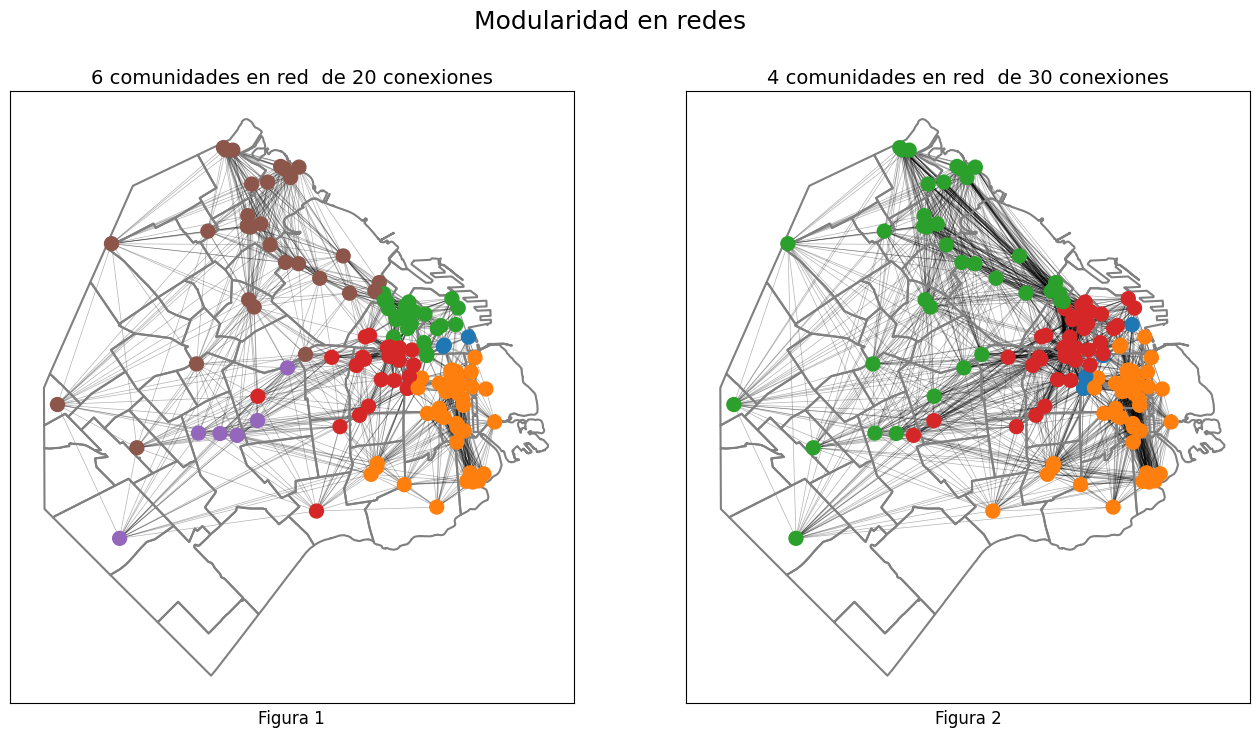

In [25]:
ms = [20,30]

fig, axs = plt.subplots(1, 2, figsize=(16, 8), squeeze=True)
fig.suptitle("Modularidad en redes", fontsize=18)
for idx_num, m in enumerate(ms):
    print(f"Modularidad en red de {m} conexiones.")
    start = time.perf_counter()
    
    A = construye_adyacencia(D,m)
    A_sim = np.ceil(1/2*(A + A.T))
    nombres = modularidad_iterativo(A_sim)
    print("cantidad de comunidades: ", len(nombres))
    print("Tiempo modularidad: ", time.perf_counter() - start)
    print(f"Cantidad de grupos: {len(nombres)}")
    

    axs = axs.flatten()
    num_grupos = len(nombres)
    colormap = plt.get_cmap('tab10' if num_grupos <= 10 else 'tab20')  # Elegí un mapa de colores. También podés usar 'hsv', 'Set3', etc.

    # Asignar un color a cada grupo
    # Asignar un color a cada grupo
    grupo_color = {}
    for grupo_id, grupo in enumerate(nombres):
        color = mcolors.to_hex(colormap(grupo_id % colormap.N))
        print(f"Grupo {grupo_id} | Museos: {len(grupo)} | Color {color}")
        for nodo in grupo:
            grupo_color[nodo] = color  # Asegura que la clave sea string

    print("Nodos con color asignado:", len(grupo_color))

    # Crear colores de nodos
    colores_nodos = [grupo_color.get(n, "#000000") for n in G.nodes]

    # Dibujar
    barrios.to_crs("EPSG:22184").boundary.plot(color='gray', ax=axs[idx_num])
    axs[idx_num].set_title(f"{num_grupos} comunidades en red  de {m} conexiones", fontsize=14)

    G = nx.from_numpy_array(A) # Construimos la red a partir de la matriz de adyacencia
    # Construimos un layout a partir de las coordenadas geográficas
    G_layout = {i:v for i,v in enumerate(zip(museos.to_crs("EPSG:22184").get_coordinates()['x'],museos.to_crs("EPSG:22184").get_coordinates()['y']))}
    nx.draw_networkx_nodes(
    G,
    G_layout,
    node_size=100,
    ax=axs[idx_num],
    node_color=colores_nodos,
    )
    nx.draw_networkx_edges(
        G,
        G_layout,
        ax=axs[idx_num],
        alpha=0.3,
        width=0.5
    )    
    axs[idx_num].set_xlabel(f'Figura {idx_num + 1}', fontsize=12)


Veamos que con 30 conexiones el algoritmo de metodo iterativo sugirio 4 comunidades. Como es una potencia de 2, podemos compraralo con el metodo laplaciano, misma idea con 50 conexiones y 2 comunidades. 

4 grupos en red con 30 conexiones
Tiempo laplaciano:  17.23656249998021
Cantidad de grupos: 4
Grupo 0 | Museos: 41 | Color #0000FF
Grupo 1 | Museos: 40 | Color #FF0000
Grupo 2 | Museos: 38 | Color orange
Grupo 3 | Museos: 17 | Color #FFFF00
Nodos con color asignado: 136
4 grupos en red con 30 conexiones
Tiempo laplaciano:  17.42355479998514
Cantidad de grupos: 4
Grupo 0 | Museos: 48 | Color orange
Grupo 1 | Museos: 45 | Color #0000FF
Grupo 2 | Museos: 38 | Color #FF0000
Grupo 3 | Museos: 5 | Color #FFFF00
Nodos con color asignado: 136


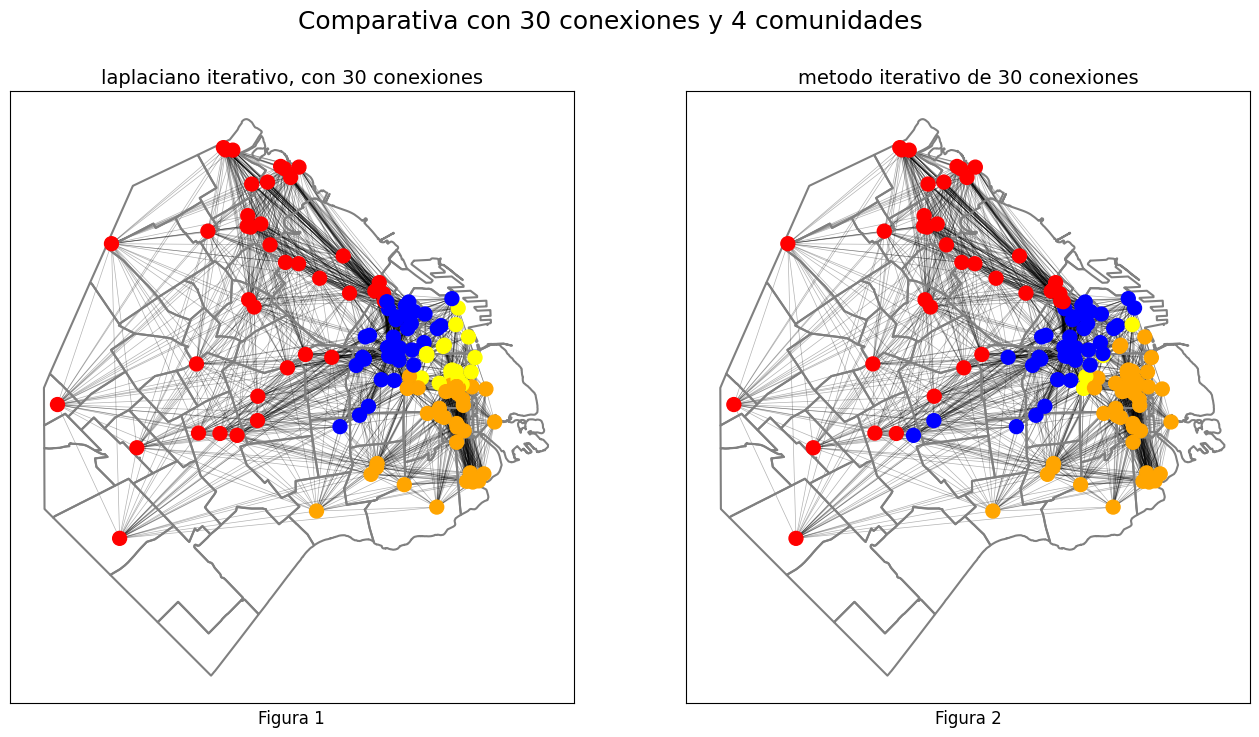

In [26]:

k = 2
ms = [30,30]
fig, axs = plt.subplots(1,2, figsize=(16, 8), squeeze=True)
fig.suptitle("Comparativa con 30 conexiones y 4 comunidades", fontsize=18)
for idx_num, m in enumerate(ms):
    print(f"{2**k} grupos en red con {m} conexiones")
    #start = time.perf_counter()
    
    A = construye_adyacencia(D,m)
    A_sim = np.ceil(1/2*(A + A.T))
    if idx_num ==0:
        nombres = laplaciano_iterativo(A_sim,2)
    else:
        nombres = modularidad_iterativo(A_sim)

    print("Tiempo laplaciano: ", time.perf_counter() - start)
    print(f"Cantidad de grupos: {len(nombres)}")
    

    axs = axs.flatten()
    num_grupos = len(nombres)
    colormap = plt.get_cmap('tab10' if num_grupos <= 10 else 'tab20')  # Elegí un mapa de colores. También podés usar 'hsv', 'Set3', etc.

    # Asignar un color a cada grupo
    # Asignar un color a cada grupo
    
    grupo_color = {}
    nombres.sort(key=len, reverse=True)
    for grupo_id, grupo in enumerate(nombres):
        #60 , 127 , 129, 133
        if 60 in grupo:
            color = "#FF0000"  # Rojo para el grupo que contiene el nodo 60
        elif 127 in grupo:
            color = "orange"
        elif 129 in grupo:
            color = "#0000FF"
        elif 133 in grupo:
            color = "#FFFF00"
        
        #color = mcolors.to_hex(colormap(grupo_id % colormap.N))
        print(f"Grupo {grupo_id} | Museos: {len(grupo)} | Color {color}")
        for nodo in grupo:
            grupo_color[nodo] = color  # Asegura que la clave sea string

    print("Nodos con color asignado:", len(grupo_color))

    # Crear colores de nodos
    colores_nodos = [grupo_color.get(n, "#000000") for n in G.nodes]

    # Dibujar
    barrios.to_crs("EPSG:22184").boundary.plot(color='gray', ax=axs[idx_num])
    axs[idx_num].set_title(f"{num_grupos} cortes minimos, con {m} conexiones", fontsize=14)

    G = nx.from_numpy_array(A) # Construimos la red a partir de la matriz de adyacencia
    # Construimos un layout a partir de las coordenadas geográficas
    G_layout = {i:v for i,v in enumerate(zip(museos.to_crs("EPSG:22184").get_coordinates()['x'],museos.to_crs("EPSG:22184").get_coordinates()['y']))}
    nx.draw_networkx_nodes(
    G,
    G_layout,
    node_size=100,
    ax=axs[idx_num],
    node_color=colores_nodos
    )
    nx.draw_networkx_edges(
        G,
        G_layout,
        ax=axs[idx_num],
        alpha=0.3,
        width=0.5
    )
    #nx.draw_networkx(G,G_layout,ax=axs[idx_num]) # Graficamos los museos
    if idx_num == 0:
        axs[idx_num].set_title(f"laplaciano iterativo, con {m} conexiones", fontsize=14)
    else:
        axs[idx_num].set_title(f"metodo iterativo de {m} conexiones", fontsize=14)
    axs[idx_num].set_xlabel(f'Figura {idx_num + 1}', fontsize=12)




Como se puede ver en las figuras la mayoria de los museos del grupo amarillo se repartieron entre el grupo azul y el grupo naranja. 
Mientras que salvo por algunos casos los museos del grupo rojo se mantuvieron en el grupo rojo, misma idea para el grupo azul.


4 grupos en red con 50 conexiones
Tiempo laplaciano:  49.062176699982956
Cantidad de grupos: 2
Grupo 0 | Museos: 66 | Color #1f77b4
Grupo 1 | Museos: 70 | Color #ff7f0e
Nodos con color asignado: 136
4 grupos en red con 50 conexiones
Tiempo laplaciano:  49.29072289998294
Cantidad de grupos: 2
Grupo 0 | Museos: 67 | Color #1f77b4
Grupo 1 | Museos: 69 | Color #ff7f0e
Nodos con color asignado: 136


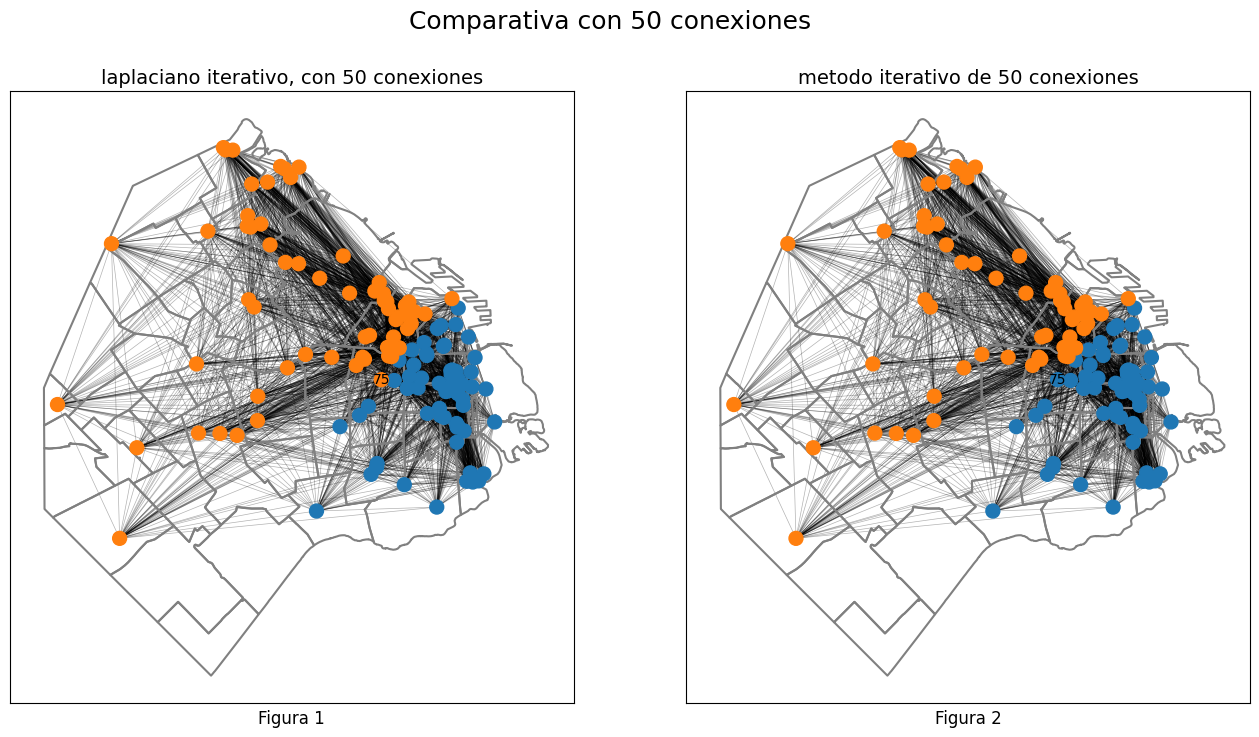

In [ ]:
k = 2
ms = [50,50]
fig, axs = plt.subplots(1,2, figsize=(16, 8), squeeze=True)
fig.suptitle("Comparativa con 50 conexiones", fontsize=18)
for idx_num, m in enumerate(ms):
    print(f"{2**k} grupos en red con {m} conexiones")
    
    A = construye_adyacencia(D,m)
    A_sim = np.ceil(1/2*(A + A.T))
    if idx_num ==0:
        nombres = laplaciano_iterativo(A_sim,1)
    else:
        nombres = modularidad_iterativo(A_sim)

    print("Tiempo laplaciano: ", time.perf_counter() - start)
    print(f"Cantidad de grupos: {len(nombres)}")
    
    axs = axs.flatten()
    num_grupos = len(nombres)
    colormap = plt.get_cmap('tab10' if num_grupos <= 10 else 'tab20')  # Elegí un mapa de colores. También podés usar 'hsv', 'Set3', etc.

    # Asignar un color a cada grupo
    grupo_color = {}
    for grupo_id, grupo in enumerate(nombres):
        color = mcolors.to_hex(colormap(grupo_id % colormap.N))
        print(f"Grupo {grupo_id} | Museos: {len(grupo)} | Color {color}")
        for nodo in grupo:
            grupo_color[nodo] = color  # Asegura que la clave sea string

    print("Nodos con color asignado:", len(grupo_color))

    # Crear colores de nodos
    colores_nodos = [grupo_color.get(n, "#000000") for n in G.nodes]

    # Dibujar
    barrios.to_crs("EPSG:22184").boundary.plot(color='gray', ax=axs[idx_num])
    axs[idx_num].set_title(f"{num_grupos} cortes minimos, con {m} conexiones", fontsize=14)

    G = nx.from_numpy_array(A) # Construimos la red a partir de la matriz de adyacencia
    # Construimos un layout a partir de las coordenadas geográficas
    G_layout = {i:v for i,v in enumerate(zip(museos.to_crs("EPSG:22184").get_coordinates()['x'],museos.to_crs("EPSG:22184").get_coordinates()['y']))}
    nx.draw_networkx_nodes(
    G,
    G_layout,
    node_size=100,
    ax=axs[idx_num],
    node_color=colores_nodos
    )
    nx.draw_networkx_edges(
        G,
        G_layout,
        ax=axs[idx_num],
        alpha=0.3,
        width=0.5
    )
    if idx_num == 0:
        axs[idx_num].set_title(f"laplaciano iterativo, con {m} conexiones", fontsize=14)
    else:
        axs[idx_num].set_title(f"metodo iterativo de {m} conexiones", fontsize=14)
    nx.draw_networkx_labels(
    G, { 75: (4921995.665489145, 6161228.5389051745),}, labels={75:"75"}, ax=axs[idx_num], font_size=10, font_color="k"
    )  # Agregamos los nombres
    axs[idx_num].set_xlabel(f'Figura {idx_num + 1}', fontsize=12)




Como se puede ver en ambas particiones los museos elegidos por ambos metodos son iguales, la unica diferencia que se tiene es en 1 solo museo el cual es el museo de Ciencias Naturales del Colegio San José (numero 75).
